# **Step 1: Generate Gaussian Random Vectors**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

np.random.seed(42)  # for reproducibility

# Parameters
num_samples = 50
mean_class1 = 0
mean_class2 = 2
covariance_matrix = np.eye(2)

# Generate random vectors
class1_samples = np.random.multivariate_normal([mean_class1, mean_class1], covariance_matrix, num_samples)
class2_samples = np.random.multivariate_normal([mean_class2, mean_class2], covariance_matrix, num_samples)

# **Step 2: Split Data into Training and Testing Sets**

In [12]:
# Concatenate and shuffle data
all_samples = np.concatenate((class1_samples, class2_samples), axis=0)
labels = np.concatenate((np.zeros(num_samples), np.ones(num_samples)))

# Shuffle data
shuffled_indices = np.random.permutation(2 * num_samples)
all_samples = all_samples[shuffled_indices]
labels = labels[shuffled_indices]

# Split into training and testing sets
ntr_values = [10, 20, 30]
nts_values = list(np.array(num_samples) - ntr_values)


# **Step 3: Train and Evaluate the Perceptron**

Weights after training with ntr=10:
[[-0.90524575  2.3849214 ]]
Biases after training with ntr=10:
[-1.]
Performance with ntr=10 and nts=40: Accuracy=67.78%


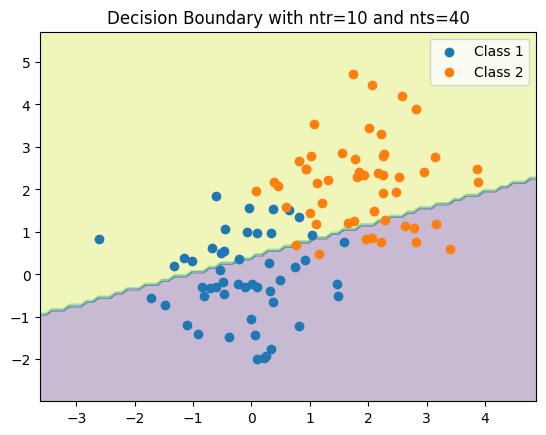

Weights after training with ntr=20:
[[0.3274158  1.76782512]]
Biases after training with ntr=20:
[-1.]
Performance with ntr=20 and nts=30: Accuracy=86.25%


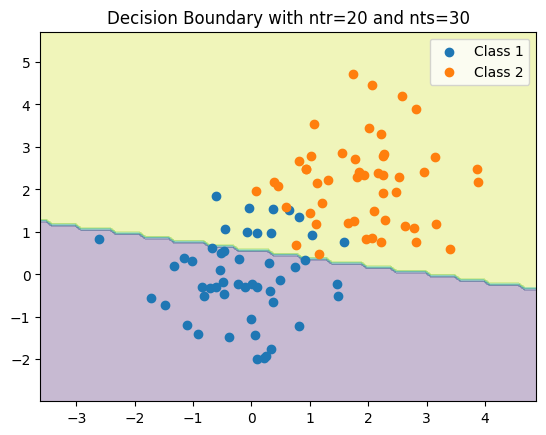

Weights after training with ntr=30:
[[2.29576408 2.21582214]]
Biases after training with ntr=30:
[-3.]
Performance with ntr=30 and nts=20: Accuracy=91.43%


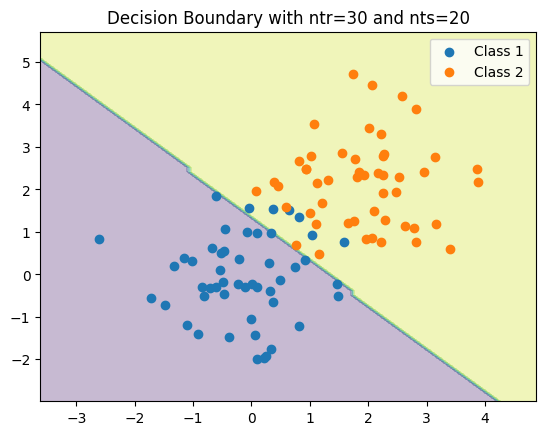

In [15]:
# Function to train and evaluate the perceptron
def train_and_evaluate(ntr_value,nts_value):
    best_accuracy = 0
    best_model = None

    # Create Perceptron model
    model = Perceptron(random_state=42)

    for _ in range(5):
        # Train the perceptron with learning data
        model.fit(all_samples[:ntr_value], labels[:ntr_value])

        # Evaluate on test data
        predictions = model.predict(all_samples[ntr_value:])
        accuracy = accuracy_score(labels[ntr_value:], predictions)

        # Keep track of the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    print(f"Weights after training with ntr={ntr_value}:\n{best_model.coef_}")
    print(f"Biases after training with ntr={ntr_value}:\n{best_model.intercept_}")
    print(f"Performance with ntr={ntr_value} and nts={nts_value}: Accuracy={best_accuracy:.2%}")

    # Plot decision boundary
    x_min, x_max = all_samples[:, 0].min() - 1, all_samples[:, 0].max() + 1
    y_min, y_max = all_samples[:, 1].min() - 1, all_samples[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class 1')
    plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class 2')
    plt.title(f'Decision Boundary with ntr={ntr_value} and nts={nts_value}')
    plt.legend()
    plt.show()

# Train and evaluate for each ntr value
for ntr, nts in zip(ntr_values, nts_values):
    train_and_evaluate(ntr, nts)